# <center>Digital Image Processing - Problem Set 3</center>

### Student Names: Catherine Diaz, Sorelys Sandoval.

This Problem Set covers the topics of frequency domain filtering and color image processing.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

In [1]:
# Import all the libraries needed
from os import listdir, path
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
# Get all the filenames in the folder images
filenames = listdir('images')

### Problem 1

Visualize the Fourier spectrum of an image. Write a function that visualizes the spectrum of an input gray-scale image. The function should perform the following steps:

1. Compute the FFT of the input image using the FFT function <tt>numpy.fft.fft2</tt>.
2. Shift the transform to center the origin in the middle of the image using <tt>numpy.fft.fftshift</tt>.
3. The Fourier transform contains complex numbers, so we usually analyze its phase and spectrum components. Write commands that compute the Fourier spectrum from the shifted Fourier transform.
4. The resulting spectrum is difficult to visualize if plotted directly. Instead, we usually apply a logarithmic intensity transform to the spectrum before visualizing. Use the <tt>numpy.log</tt> function to accomplish this.
5. Plot the modified spectrum.

Test your function by applying it to the images <tt>face.png</tt>, <tt>blown_ic.png</tt>, <tt>test_pattern_blurring_orig.png</tt>, <tt>translated_rectangle.png</tt> and <tt>rectangle.png</tt>.

Please comment your results.

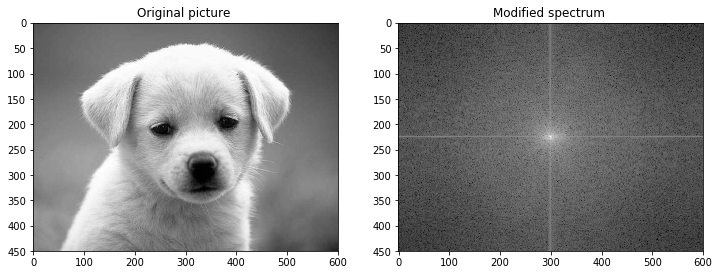

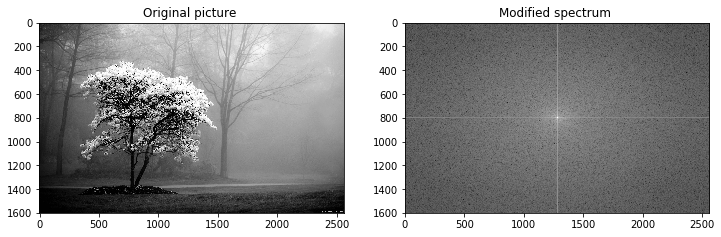

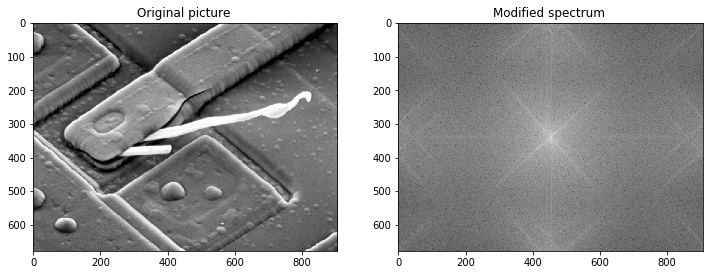

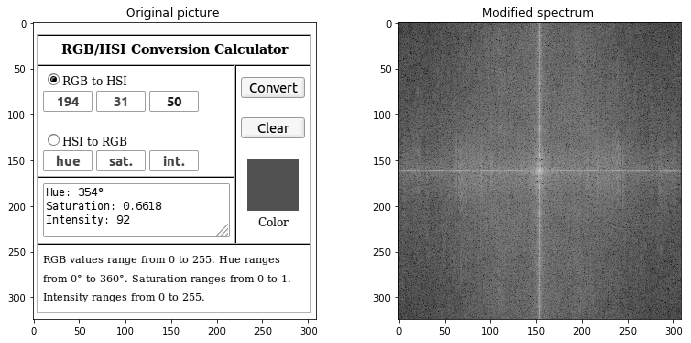

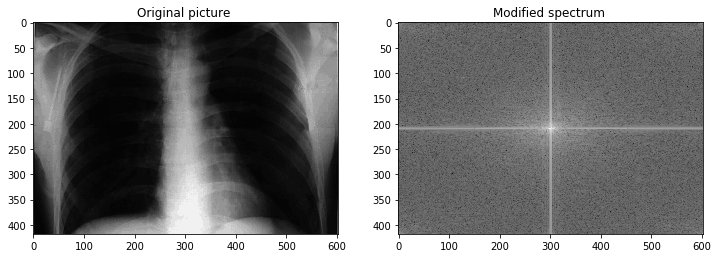

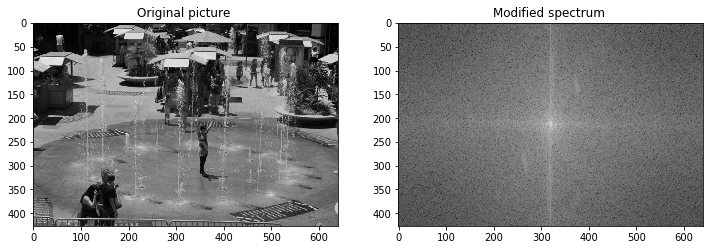

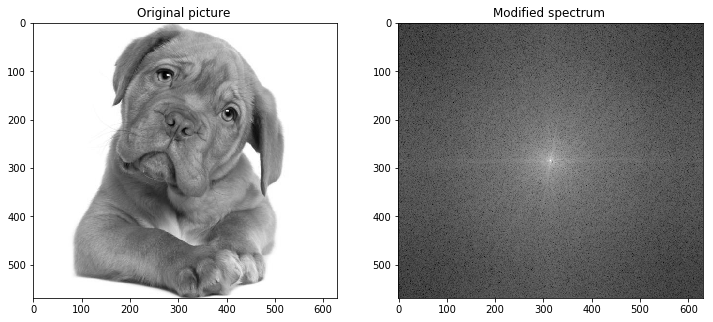

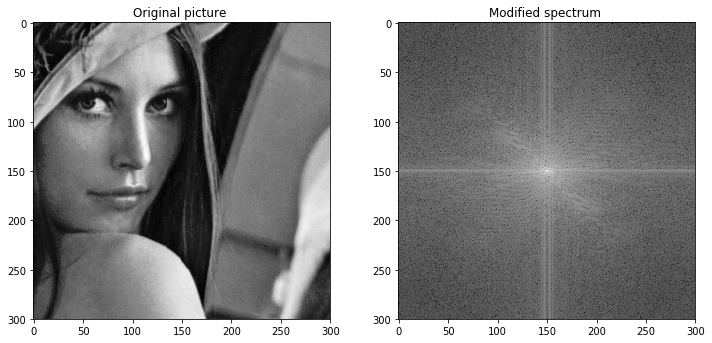

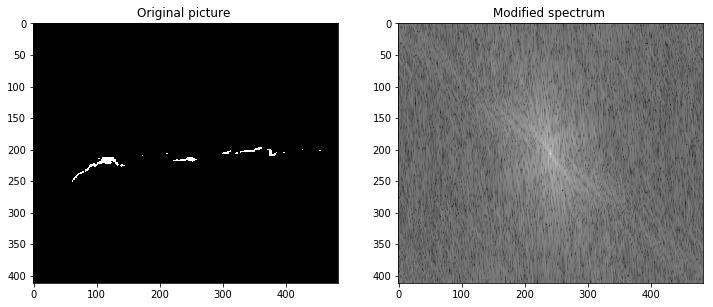

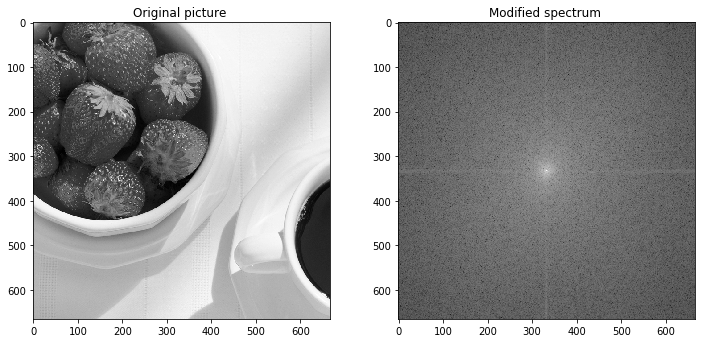

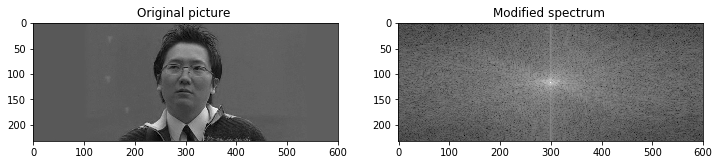

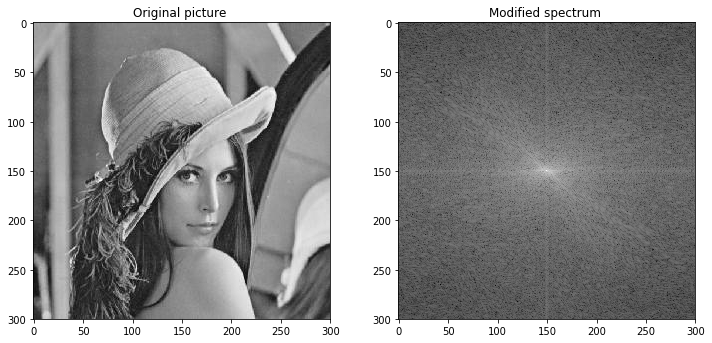

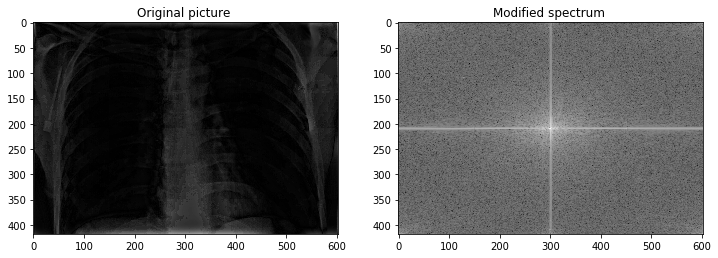

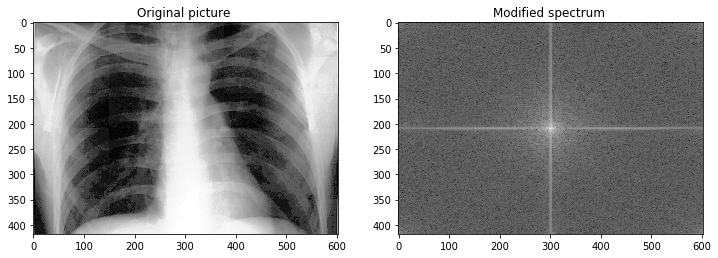

c:\python27\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log


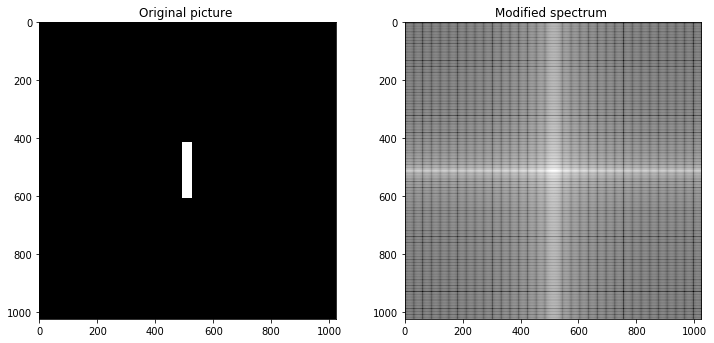

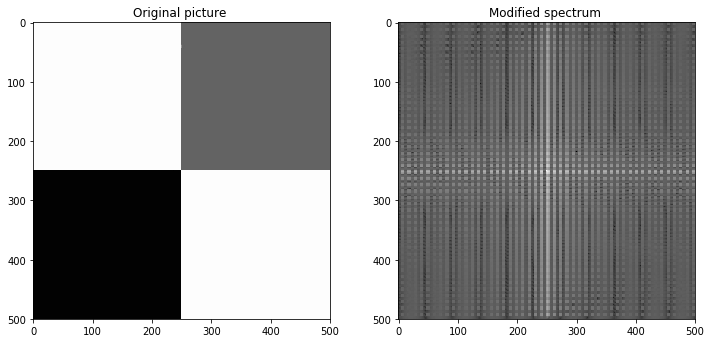

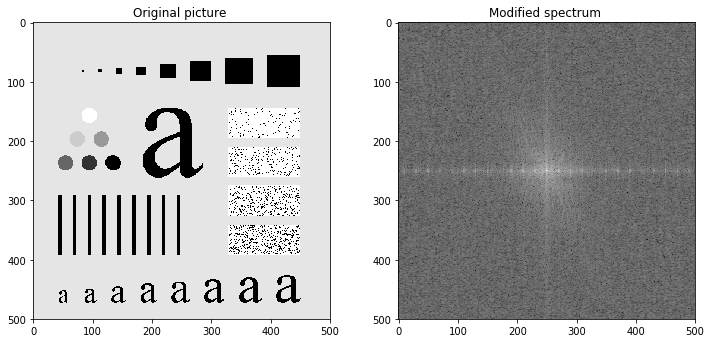

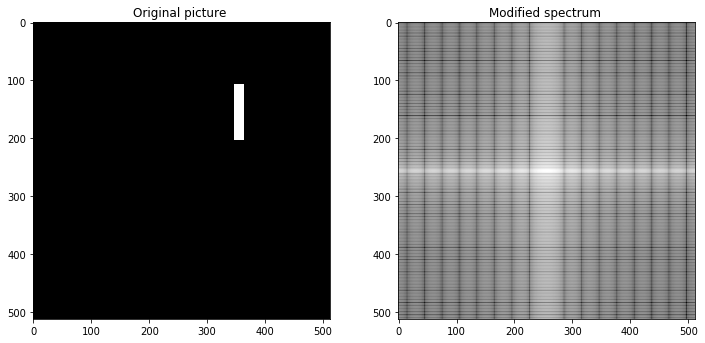

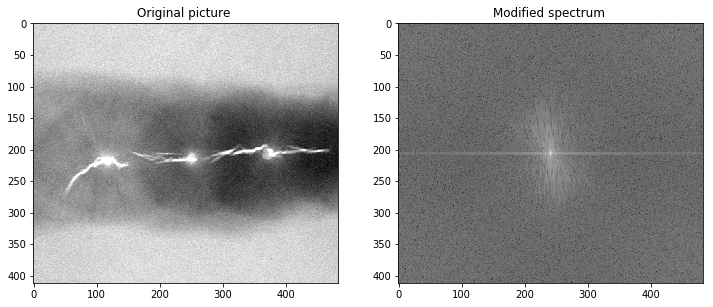

In [7]:
def fourier(imag):
    """The 2-dimensional discrete fourier transform is computed, the result is a complex array"""
    ffft= np.fft.fft2(imag); 
    shifft = np.fft.fftshift(ffft);  
    modspec = 20*np.log(np.abs(shifft));
    return [shifft, modspec]

images = [] # List with all the images read
for i,name in enumerate(filenames):
    img = cv2.imread("images/"+name,0);
    plt.figure(figsize=(12,12));plt.subplot(2,2,1);plt.title("Original picture ");plt.imshow(img,cmap = 'gray');
    
    plt.subplot(2,2,2); plt.title("Modified spectrum ");
    [shift, modif]=fourier(img);
    plt.imshow(modif, cmap = 'gray');
    plt.show();

<p><em><strong>Code functionality:</strong></em> An image has its Fourier transform calculated, it is known that these transforms must be shifted so that they can be used as filters and operated. The frequency spectrum is displayed and it is easier to analyze than if the regular frequencies resulting from the transform were the ones directly shown. To display this modified spectrum, only the absolute part of the transform is taken to then have a logarithm modify it. The original image and the modified spectrum are the displayed.</p>
<p><em><strong>Functions used and description:</strong></em></p>
<p>The function <strong>np.fft.fft2()</strong> takes as its first argument the image, other arguments such as the length of the transformed axis are optional. This function computes the 2-dimensional discrete Fourier transforms.</p>
<p><strong>Np.fft.fftshift()</strong> is a function which changes the positions of the first and second halves of data for all axes listed.</p>
<p>The function <strong>np.log() </strong>does the logarithm of the real part of the shifted Fourier transform, and its result is the representation of the magnitude spectrum.</p>
<p><strong><em>A curious thing:</em></strong> It shows frequencies with bigger magnitude values lighter, seems like somehow in most of them corners and sharp edges are also related to the shape that is displayed, whereas with images with not so sharp edges and softer transitions the spectrums seems much more diffused, which makes sense because of the theory behind it.</p>

### Problem 2

Frequency domain filtering. Write a PYTHON function that performs high-frequency emphasis (hfe) filtering. Recall that an hfe filter is defined as:
\begin{equation}
H_{hfe}(u,v) = a + b \cdot H_{hp}(u,v)
\end{equation}
where $a$ is the offset, $b$ is the high-frequency amplification and $H_{hp}$ is the transfer function of a high-pass filter. Your function should be based on a second-order high-pass Butterworth filter with a cut-off frequency $D_0$, which is given by:
\begin{equation}
H_{hp}(u,v) = \frac{1}{1 + \left[\frac{D_0}{D(u,v)}\right]^{2n}}.
\end{equation}
<b>Note. </b> $D(u,v)$ measures the Euclidean distance from the point $(u,v)$ to the center of the frequency plane.

Use your function and filters on the image <tt>chest.jpg</tt> to reproduce the image enhancement illustrated below.

<img src="files/images/chest.jpg"/ width=200> <img src="files/images/out.png"/width=200>

The outline of the process is the following:

1. Create a high-pass Butterworth filter with a frequency domain dimension of 2 times the size of the input image. Plot the filter image.
2. Compute the FFT of the input image using the function <tt>numpy.fft.fft2</tt>. The FFT should have frequency domain dimensions equal to the dimensions of the filter, which should be set using the input parameters of the <tt>fft2</tt> function. Plot the FFT image.
3. Filter the image using the high-pass Butterworth filter. To filter an image in the frequency domain, you should multiply the fourier transform of the image and the frequency response of the filter. To go back to the spatial domain, you need to apply the inverse FFT and take the real component of the resut. Plot the resulting image.
4. Create a high-frequency emphasis filter based on the Butterworth filter of step 1. Plot the filter image.
5. Filter the image using a high-frequency emphasis filter. Plot the resulting image.
6. After filtering, you may need to stretch the intensity values of each resulting image to the range [0, 255]. You can achieve this by substracting the minimum intensity value, dividing by the maximum and multiplying the result by 255.
7. Apply histogram equalization to the image obtained in the previous step. You should obtain a similar result to that shown above.

Use the following parameters for the filters: $a = 0.5$, $b = 2$, $n=2$ and $D_0$ should be set to $5\%$ of the vertical dimension of the filter.

Please comment your results.

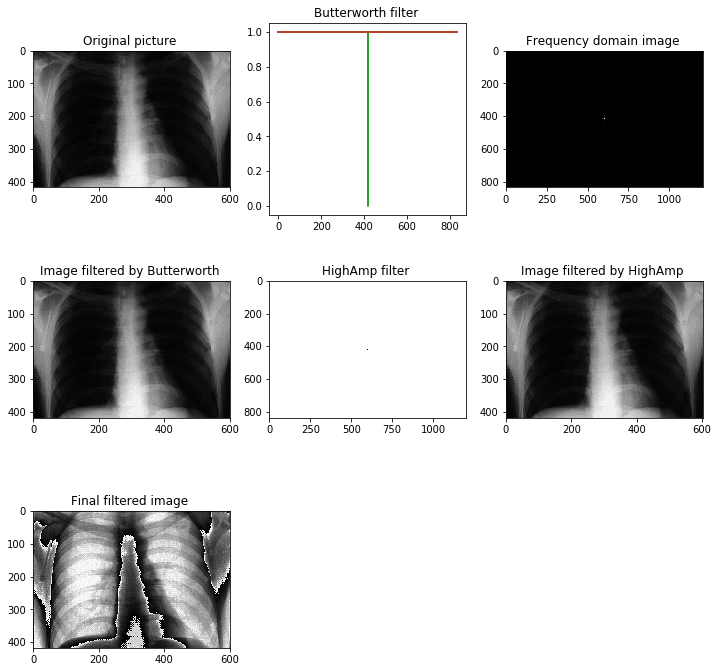

In [3]:
"""The distance between a pixel and the center is calculated"""
def dist(x1,width,y1,height):
    return((width-0)**2+(height-0)**2)**(1/2.0)

def filters(img):
    height, width = img.shape;
    Do=0.05*height*2.0
    bu = np.zeros((height*2,width*2), dtype=np.float)
    hiamp = np.zeros((height*2,width*2), dtype=np.float)
    """Two cycles are used to go through every single pixel of the arrange with double the size of the image"""
    for a in range (height*2):
        for b in range (width*2):
            if not (a == height and b == width):
                x=-width+b
                y=height-a
                """Butterworth filter"""
                bu[a][b]= 1/(1+(Do/dist(0,width,0,height))**4.0);
                """High frequency emphasis filter"""
                hiamp[a][b]=0.5+2*bu[a][b];
    """The fourier transform is done and the size of the frequency is double the height and width"""
    ffft= np.fft.fft2(img,[height*2,width*2]);
    shifft = np.fft.fftshift(ffft); 
    
    """The inverse of the shift of the transform is necessary so that it can be operated with the butterworth filter"""
    """It is the same than the image going through the filter"""
    ishifft=np.fft.ifftshift(shifft)
    filtered1=abs(np.fft.ifft2(np.multiply(bu,ishifft)))
    filtered=np.array(filtered1[:height,:width])
    
    """The image is put through the frequency emphasis filter too"""
    filteredam=abs(np.fft.ifft2(np.multiply(hiamp,ishifft))) 
    filteredamp=np.array(filteredam[:height,:width])
    
    """The frequency emphasis filter gets its histogram equalized and so, the picture gets even neater"""
    equ = cv2.equalizeHist(np.array(filteredamp,dtype=np.uint8))
    return [bu, hiamp, shifft,filtered, filteredamp, equ]

img = cv2.imread("chest.jpg",0);
plt.figure(figsize=(12,12));plt.subplot(3,3,1);plt.title("Original picture ");plt.imshow(img,cmap = 'gray');
bu, hiamp, shifft, filtered, filteredamp, equ = filters(img)

plt.subplot(3,3,2); plt.title("Butterworth filter ");
plt.plot(bu); 
plt.subplot(3,3,3); plt.title("Frequency domain image ");
plt.imshow(abs(shifft), cmap = 'gray');
plt.subplot(3,3,4); plt.title("Image filtered by Butterworth ");
plt.imshow(filtered, cmap = 'gray')
plt.subplot(3,3,5); plt.title("HighAmp filter ");
plt.imshow(hiamp, cmap = 'gray')
plt.subplot(3,3,6); plt.title("Image filtered by HighAmp ");
plt.imshow(filteredamp, cmap = 'gray');
plt.subplot(3,3,7); plt.title("Final filtered image ");
equ=(equ-(equ.min()/equ.max()))*255
plt.imshow(equ, cmap = 'gray');

<p><em><strong>Code functionality:</strong></em>A function calculates the distance between a pixel and the center of the arrange. Another function contains the two filters that can modify an image to make it clearer and easier to understand. The filters are constructed by following the structure of their equations. Because of this they need to be inside of two loops that allow the first distance mentioned to be obtained for every single pixel in the arrange. A high pass Butterworth filter and a High frequency emphasis filter are built. The results of an image going through them are displayed, as well as the original image and the filters themselves. Also a combination of the two filters, generates a high frequency boosting result, with the image presenting all the details wanted.</p>
<p><em><strong>Functions used and description:</strong></em></p>
<p>The function <strong>np.fft.ifftshift() </strong>is the inverse from the usual Fourier shift.</p>
<p>The function <strong>np.multiply() </strong>multiplies two input arrays. It is used to modify the image with the filter. As both of them are operated while in the frequency dominium there is no problem when doing the modification by doing the operation.</p>
<p>On the last problem set the histogram was equalized by using the cdf but an easier way is using the function<strong> cv2.equalizeHist()</strong> which only needs as its first argument the array which is going to be modified.</p>
<p><strong><em>A curious thing:</em></strong> The two filters produce similar results when used apart from each other, and none of the results is actually mind-blowing good, so seeing kind of a combination of both do exactly as it is needed is a little surprising.</p>

### Problem 3

Color spaces. Write a function that converts an image from the RGB color
space to HSI color space. Write another function that converts an image from the HSI
color space to RGB color space. You should use the homework equations to implement these conversions.

When plotting images in the HSI space, you should plot each channel separately, using one image for the H channel, another for the S channel and another for the I channel.

Test your function converting images from RGB to HSI and back to RGB.

In [ ]:
def rgb2hsi(image):
    """ Function that converts an image from RGB to HSI.
    Input:  image: numpy array with the image data (RGB).
    ====== 
    
    Output: numpy array with the converted image.
    ======
    """
    height, width = image.shape[0], image.shape[1]
    h=np.zeros((height,width), np.float)
    s=np.zeros((height,width), np.float)
    i=np.zeros((height,width), np.float)
    for row in range(height):
        for col in range(width):
            b=image[row,col,0]/255.0; g=image[row,col,1]/255.0; r=image[row,col,2]/255.0
            cmax = max(r,g,b); cmin = min(r,g,b)
            delta = cmax-cmin
            i[row][col] = (cmax+cmin)/2
            if delta==0:
                h[row][col] = 0
                s[row][col] = 0
            elif cmax==r:
                h[row][col] = 60*(g-b)/delta
            elif cmax==g:
                h[row][col] = 120 + 60*(b-r)/delta
            elif cmax==b:
                h[row][col] = 240 + 60*(r-g)/delta
            if h[row][col]<0:
                h[row][col]=h[row][col]+360
            if i[row][col]<0.5:
                s[row][col] = delta/(cmax+cmin)
            elif i[row][col]>0.5:
                s[row][col] = delta/(2-(cmax+cmin))
    return cv2.merge((h,s,i))

def hsi2rgb(image):
    """ Function that converts an image from HSI to RGB.
    Input:  image: numpy array with the image data (HSI).
    ====== 
    
    Output: numpy array with the converted image.
    ======
    """
    height, width = image.shape[0], image.shape[1]
    r=np.zeros((height,width), np.float)
    g=np.zeros((height,width), np.float)
    b=np.zeros((height,width), np.float)
    for row in range(height):
        for col in range(width):
            h=image[row,col,0]; s=image[row,col,1]; i=image[row,col,2]
            c=(1- np.abs(2*i-1))*s
            x=c*(1 - np.abs((h/60.0)%2.0 - 1))
            m=i-c/2.0
            if (0<=h and h<60):
                r[row][col] = c+m
                g[row][col] = x+m
                b[row][col] = 0+m
            elif (60<=h and h<120):
                r[row][col] = x+m
                g[row][col] = c+m
                b[row][col] = 0+m
            elif (120<=h and h<180):
                r[row][col] = 0+m
                g[row][col] = c+m
                b[row][col] = x+m
            elif (180<=h and h<240):
                r[row][col] = 0+m
                g[row][col] = x+m
                b[row][col] = c+m
            elif (240<=h and h<300):
                r[row][col] = x+m
                g[row][col] = 0+m
                b[row][col] = c+m
            elif (300<=h and h<360):
                r[row][col] = c+m
                g[row][col] = 0+m
                b[row][col] = x+m
    return cv2.merge((r,g,b))

names = ["fruits.jpg","lena.jpg","dog.jpg"]
for name in names:
    img =  cv2.imread("images/"+name)
    out_hsi = rgb2hsi(img)
    h,s,i = cv2.split(out_hsi)
    out_rgb = hsi2rgb(out_hsi)
    plt.figure(); plt.imshow(h,'gray'); plt.title("H");
    plt.figure(); plt.imshow(s,'gray'); plt.title("S");
    plt.figure(); plt.imshow(i,'gray'); plt.title("I");
    plt.figure(); plt.imshow(out_rgb); plt.title("RGB");

In [ ]:
# HSI to RGB http://www.rapidtables.com/convert/color/hsl-to-rgb.htm
# RGB to HSI http://www.rapidtables.com/convert/color/rgb-to-hsl.htm
# http://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html

<p><em><strong>Code functionality: </strong></em>The image is read in bgr because it is read with the function imread(), so it is nor rgb but bgr. The functions are applications of equations found to do the conversion from one type of color to other one, based on the information of the three links above. The conversion is done pixel by pixel.</p>
<p><em><strong>Functions used and description:</strong></em></p>
<p>The function <strong>cv2.split()</strong> splits the BGR images to single planes. It is a costly function to use in terms of time.</p>
<p><strong><em>Curious fact:</em></strong> As the functions must go through the whole image pixel by pixel the conversion process is slow, on the other hand Opencv has its own function to do the conversion, used for plotting which is <strong>cv2.cvtColor(image,FORMAT)</strong>. That function has insted of the HSI convention, the HLS, so the order of the channels changes, besides for images of 8 bytes [0,255] the function gets the values from H to be H/2, so that they fit into the 8 bytes, but on the function that was created, they are left as the theory says and it still looks good in matplotlib, because the plot adappts to the scale of the image . To keep it from getting wrecked in other computers they had to be rescaled to [0,255], but it was chosen not to do that to be able to stick entirely to what the theory indicated. Also that way the RGB conversion turned out to be a little easier. Furthermore, as the output of hsi2rgb is in the RGB format , it is not necessary to to the conversion of BGR to RGB to plot the images that come out of hsi2rgb. </p>

### Problem 4

Manipulating color images. Write a function that converts a color image from the RGB to
the HSI color space, modifies the ‘I’ channel by applying histogram equalization, and revert
back the image to the RGB color space. Apply this function to enhance the image <tt>dark_fountain.jpg</tt>.

c:\python27\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


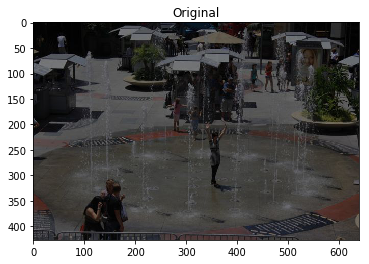

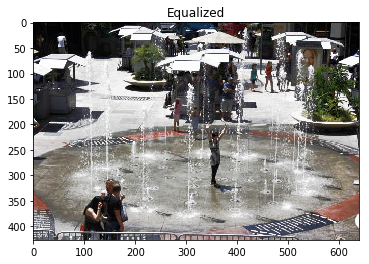

In [101]:
def equ_hist(image):
    """ Function that equalize an image.
    Input:  image: numpy array with the image data (RGB).
    ====== 
    
    Output: numpy array with the equalized image.
    ======
    """
    hsi = rgb2hsi(image.copy())
    equ = cv2.equalizeHist(np.array(255*hsi[:,:,2],dtype = np.uint8))
    hsi[:,:,2] = np.array(equ, np.float64)/255
    return hsi2rgb(hsi)

img = cv2.imread("images/dark_fountain.jpg");
equ_img = equ_hist(img)

plt.figure(); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original");
plt.figure(); plt.imshow(equ_img); plt.title("Equalized");

<p><em><strong>Code functionality: </strong></em>The image function from the last point is used again to acquire the matrix of the image that corresponds to [:,:] in the HSI format. Then the function <strong>equalizeHist() </strong>of Opencv is used to do the equalization of the channel (the I one). As the function of the previous problem gets I to have values between 0&lt;i&lt;1, they need to be multiplied by 255 and make it uint8 so that the open cv function can be used. Then the matrix I is assigned the equalized matrix over 255 to take it to the HSI format that handles the function from the last point. Finally it is returned to RGB.</p>

### Problem 5 

Manipulating color images. Consider the RGB color image <tt>squares.jpg</tt>, where the
squares are pure red, green and blue.

<img src="files/images/squares.jpg" width=200 />

1. Convert this image to the HSI color space. Blur the H component of the image using a 25x25 averaging mask, and convert it back to RGB. How do you explain the obtained result?
2. Repeat, blurring only the saturation component this time. How do you explain the result?


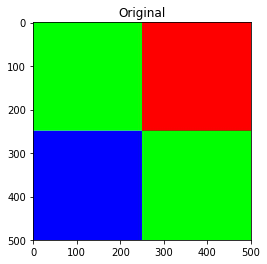

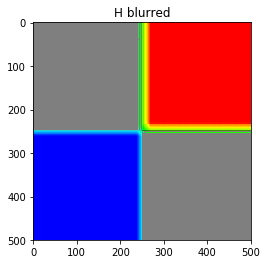

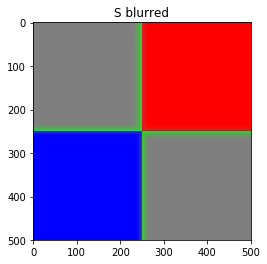

In [75]:
name = "squares.jpg"
img =  cv2.imread("images/"+name)
out_hsi = rgb2hsi(img)
out1 = out_hsi.copy()
out1[:,:,0] = cv2.blur(out1[:,:,0],(25,25))
out2 = out_hsi.copy()
out2[:,:,1] = cv2.blur(out2[:,:,1],(25,25))

plt.figure(); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original");
plt.figure(); plt.imshow(hsi2rgb(out1)); plt.title("H blurred");
plt.figure(); plt.imshow(hsi2rgb(out2)); plt.title("S blurred");

<p><em><strong>Code functionality: </strong></em>Again the point starts changing the color of an image with the same function created before, but after this, a blurring filter was applied only over the H part of the image. Then the image had to be turned back to RGB format. The blurring made the borders not be binary anymore but a transition of color by steps because of the hue parameter probably. On the other hand when only the saturation component is blurred it can be seen thst the borders also stop being binary but the transition of the color occurs differently, in more of a degradation and without other colors popping up.</p>

## Problem 6

False color. Write a Python function that produces a false color visualization of
the input gray-scale image as follows:

1. If the intensity of an input pixel is lower than a threshold $T$, then the color of the corresponding pixel should be blue.
2. If the intensity of an input pixel is larger or equal than a threshold $T$, then the color of the corresponding pixel should be yellow.

Use your function to reproduce the following result on the image <tt>weld_x-ray.jpg</tt>:

<img src="files/images/weld_x-ray.jpg" width=200 /> <img src="files/images/Fig6.21(b).jpg" width=200 /> 

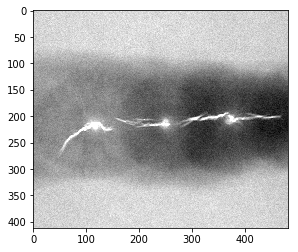

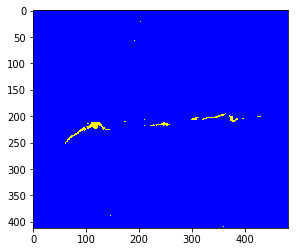

In [73]:
def false_color(image,T):
    """ Function that produces a false color visualization of a gray-scale image.
    Input:  image: numpy array with the image data (gray-scale).
    ====== 
    
    Output: numpy array with the false color image.
    ======
    """
    height, width = image.shape[0], image.shape[1]
    out=np.zeros((height,width,3), np.uint8)
    blues = np.where(image<T,255,0)
    yellows = 255 - blues
    out[:,:,0]=blues; out[:,:,1]=yellows; out[:,:,2]=yellows;
    return out

img = cv2.imread("images/weld_x-ray.jpg", cv2.IMREAD_GRAYSCALE)
out = false_color(img,250)
plt.figure();plt.imshow(img, cmap='gray')
plt.figure();plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

<p><em><strong>Code functionality: </strong></em>In this point a 3 channel matrix full of zeros was created. Using the function <strong>where()</strong> it is created a matrix where the pixels that fulfil the condition, will be the values of 255 in the new matrix and otherwise will be 0. The yellow parts will be the &ldquo;negative&rdquo; of the blue. The matrix full of zeros had assigned in its first channel, the blue ones. The other two channels were assigned with the yellow ones, because in the BGR format yellow is [0,255,255]. Then the image is displayed after being converted to RGB so that it looks good with matplotlib.</p>

## Problem 7

Green screen effects. Write a function that replaces the green background of the image <tt>hiro.jpg</tt> with a background image of your choice.

<img src="files/images/hiro.jpg" width=300>

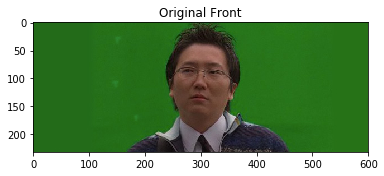

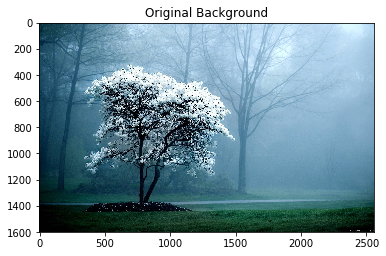

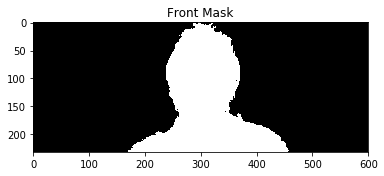

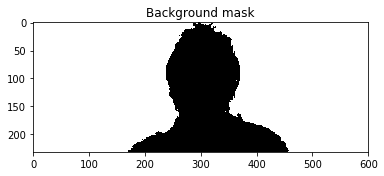

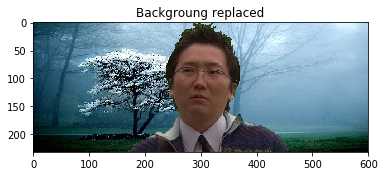

In [95]:
def chroma_key(image,image2):
    """ Function that replaces the green background of an image.
    Input:  image: numpy array with the front image.
    ====== image2: numpy array with the background image.
    
    Output: numpy array with the replaced image.
    ======
    """
    hls = image.copy(); bkgnd = image2.copy(); front = image.copy()
    height, width = front.shape[:2]
    bkgnd = cv2.resize(bkgnd,(width, height), interpolation = cv2.INTER_CUBIC)
    hls =cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]; L = hls[:,:,1]; S = hls[:,:,2]
    greens = np.where((50<H)&(H<67)&(30<L)&(L<90),1,0)
    not_green = 1-greens
    bkgnd[:,:,0] = bkgnd[:,:,0]*greens; bkgnd[:,:,1] =bkgnd[:,:,1]*greens; bkgnd[:,:,2] = bkgnd[:,:,2]*greens
    front[:,:,0] = front[:,:,0]*not_green; front[:,:,1] =front[:,:,1]*not_green; front[:,:,2] = front[:,:,2]*not_green
    return bkgnd + front


img =  cv2.imread("images/hiro.jpg")
img2 =  cv2.imread("images/background.jpg")
out = chroma_key(img,img2)
plt.figure(); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original Front");
plt.figure(); plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)); plt.title("Original Background");
plt.figure(); plt.imshow(not_green*255,'gray'); plt.title("Front Mask");
plt.figure(); plt.imshow(greens*255, 'gray'); plt.title("Background mask");
plt.figure(); plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.title("Backgroung replaced");

<p><em><strong>Code functionality: </strong></em>In this last point he background of an image is replaced with another picture previously resized to the size of the first one.&nbsp;</p>
<p>Since the background image could have a different size, it is necessary to crop it or resize it. The function resize of opencv was used to resize the background image to match the size of the image with the green background.</p>
<p>To &ldquo;catch&rdquo; the background, the color scale of the image was transformed to the HSI scale in order to get the green pixels. However the background is not pure green like H=120&deg;(=60&deg; for the convention of the HSI function converter) [http://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html],&nbsp; therefore it was included the I parameter to get the green of the image. Trying to generalize the function for a wide spectrum of greens the conditional is a range: 55 &lt;H&lt;60 and 66&lt;L&lt;70. It was used the function <strong>where()</strong> of numpy which gets the condition and evaluates it for each element of the matrix. The background mask is 1 for the pixels out of the condition and 0 for the ones inside. The front mask is the negative image of the background mask. The replaced image is the background image multiplied by the background mask in order to make the pixels 0. &nbsp;Corresponding to the front or not green pixels plus the front image multiplied by the front mask in order to make 0 the green pixels.</p>
<p><strong><em>A curious thing:</em></strong> The function previously created to convert, was not used in this case because it is too slow.</p>